In [51]:
import pandas as pd

In [52]:
df = pd.read_csv("whatnot_analytics_take_home.csv")
df.tail()

,user_id,seller_id,user_installed_at,is_active,seller_approved,order_id,subtotal_cents,shipping_price_cents,status,authentication_fee_cents,order_processed_at,sales_channel,style,livestream_id,listing_id,brand_name,product_name,listing_title,listing_desc,listing_condition_id
40280,82212,75264,2020-12-24 02:04,True,False,184068,800,0,completed,0,2021-02-23 00:21,LIVESTREAM,DIRECT_ORDER,30614250-5d96-11eb-b9fd-3965403a36dc,372221,Pokemon,Sun & Moon - Cosmic Eclipse Booster Pack,Sun & Moon - Cosmic Eclipse Booster Pack #01,Ripped and shipped (+1 entry),91
40281,86657,78923,2021-01-03 21:28,True,True,175677,3000,350,completed,0,2021-02-19 17:02,STANDARD,DIRECT_ORDER,NaN,244533,Funko,Big Bird,NaN,NaN,2
40282,103672,47141,2021-01-30 02:12,True,False,181028,1700,0,completed,0,2021-02-21 16:13,LIVESTREAM,DIRECT_ORDER,c8c24a50-6992-11eb-b643-8dff76c8cb0c,367268,Pokemon,Livestream Card Item,Shining Fates ETB #1 #03,NaN,88
40283,100236,1126,2021-01-25 06:12,True,False,184069,1400,350,completed,0,2021-02-23 00:21,LIVESTREAM,DIRECT_ORDER,9e1e53f0-72ef-11eb-9270-3b8cac001f48,372223,Funko,Fiona Goode,Fiona Goode,Good,90
40284,99158,79568,2021-01-24 01:55,True,False,184042,1200,350,completed,0,2021-02-23 00:09,LIVESTREAM,DIRECT_ORDER,04ac0780-6a6b-11eb-b037-0d6d71edffd9,372174,Pokemon,Live Pokemon Card,Black Star Promo - Meowth Gameboy Holo,NM - Condition as shown,88


In [53]:
df.shape

(40285, 20)

In [54]:
cols = df.columns.tolist()
cols

['user_id',
 'seller_id',
 'user_installed_at',
 'is_active',
 'seller_approved',
 'order_id',
 'subtotal_cents',
 'shipping_price_cents',
 'status',
 'authentication_fee_cents',
 'order_processed_at',
 'sales_channel',
 'style',
 'livestream_id',
 'listing_id',
 'brand_name',
 'product_name',
 'listing_title',
 'listing_desc',
 'listing_condition_id']

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40285 entries, 0 to 40284
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   40285 non-null  int64 
 1   seller_id                 40285 non-null  int64 
 2   user_installed_at         40285 non-null  object
 3   is_active                 40285 non-null  bool  
 4   seller_approved           40285 non-null  bool  
 5   order_id                  40285 non-null  int64 
 6   subtotal_cents            40285 non-null  int64 
 7   shipping_price_cents      40285 non-null  int64 
 8   status                    40285 non-null  object
 9   authentication_fee_cents  40285 non-null  int64 
 10  order_processed_at        40285 non-null  object
 11  sales_channel             40285 non-null  object
 12  style                     40285 non-null  object
 13  livestream_id             32593 non-null  object
 14  listing_id            

In [56]:
df['user_installed_at'] = pd.to_datetime(df['user_installed_at'])
df['order_processed_at'] = pd.to_datetime(df['order_processed_at'])

In [57]:
# create new column for later analysis

df['activation_time'] = df['order_processed_at'] - df['user_installed_at']

In [58]:
df.isna().sum()

user_id                         0
seller_id                       0
user_installed_at               0
is_active                       0
seller_approved                 0
order_id                        0
subtotal_cents                  0
shipping_price_cents            0
status                          0
authentication_fee_cents        0
order_processed_at              0
sales_channel                   0
style                           0
livestream_id                7692
listing_id                      0
brand_name                      0
product_name                    0
listing_title                7692
listing_desc                15634
listing_condition_id            0
activation_time                 0
dtype: int64

In [59]:
# this dataset period covers 71 days from mid-Dec to end of Feb

print(max(df.order_processed_at))
print(min(df.order_processed_at))
print(max(df.order_processed_at) - min(df.order_processed_at))

2021-02-27 23:58:00
2020-12-18 01:47:00
71 days 22:11:00


In [60]:
# gross this period & avg daily gross

print(df.subtotal_cents.sum()/100)
print(df.subtotal_cents.sum()/100/71)

1248425.39
17583.456197183095


### brand and product overview:

In [61]:
# revenue & quantity per brand
print()
print("Funko/Pokemon comprise overwhelming portion of total orders.  \n\nWhat could be done to attract more buyers and sellers of Panini sports cards?")
print()
print(f"There are currently only {df[df['brand_name']=='Panini']['seller_id'].nunique()} different people who sell Panini, \ncompared to 1711 for Funko and 378 for Pokemon.")

df.groupby('brand_name').agg(revenue = pd.NamedAgg(column='subtotal_cents', aggfunc=sum),
                             quantity_sold = pd.NamedAgg(column='subtotal_cents', aggfunc=len)).sort_values(by='revenue', ascending=False)



Funko/Pokemon comprise overwhelming portion of total orders.  

What could be done to attract more buyers and sellers of Panini sports cards?

There are currently only 72 different people who sell Panini, 
compared to 1711 for Funko and 378 for Pokemon.


,revenue,quantity_sold
brand_name,,
Funko,64612049,22943
Pokemon,54993465,16073
Panini,3953700,909
Martian Toys,430610,86
Other,402900,163
Sony,184000,2
Figpin,137465,71
Topps,59200,16
LootLocks,38700,14


In [62]:
pokemon_sellers = df[df['brand_name']=='Pokemon']['seller_id'].unique()
pokemon_sellers
pokemon_sellers = df[df['seller_id'].isin(pokemon_sellers)].copy()
pokemon_sellers.groupby('brand_name')['brand_name'].count()

brand_name
Abomidable Toys        2
Figpin                32
Funko               9312
LootLocks             14
Martian Toys          10
Other                112
Panini               686
Pokemon            16073
Topps                 13
Name: brand_name, dtype: int64

In [63]:
print("There's only 909 total Panini transactions, and 75% of those are from Pokemon sellers.\nIt seems that the majority of the 72 Panini sellers are getting most of their income from selling Pokemon actually.\nDue to card sellers easily overlap different type of cards within their side hustle?\n\nNEXT ACTION: \n\t--Are we missing out on elite sports card sellers who specialize in only that (ie not Pokemon sellers who just happen to sell sports cards too?)\n\t--Is it easier to nudge Pokemon sellers to start selling sports cards or vice versa?\n\t--How to determine which outreach would be cheaper, faster or lead to larger ROI?  Guiding sellers to expand their product offerings would seem to engender loyalty, especially among early adopters, and could increase LTV\n\t--Its known that sports card trading market is nearly 5 billion, mostly on ebay; but how much of that market would be excited to discover live streaming auction experience, or is something keeping them from it?\n\t--Would sports fans prefer a slightly format to the livestream?\n\t--With news reports of sports cards outperforming the S&P and the rise of a new investor class, along with the record breaking $4.6 mil Doncic rookie card sale this  year, perhaps there are opportunitites for sports cards sellers to try out the livestream auction which would be more enjoyable\n\t--Perhaps looking into how sports sellers are onboarded, and gather some qualitative data about their experience on the app")

There's only 909 total Panini transactions, and 75% of those are from Pokemon sellers.
It seems that the majority of the 72 Panini sellers are getting most of their income from selling Pokemon actually.
Due to card sellers easily overlap different type of cards within their side hustle?

NEXT ACTION: 
	--Are we missing out on elite sports card sellers who specialize in only that (ie not Pokemon sellers who just happen to sell sports cards too?)
	--Is it easier to nudge Pokemon sellers to start selling sports cards or vice versa?
	--How to determine which outreach would be cheaper, faster or lead to larger ROI?  Guiding sellers to expand their product offerings would seem to engender loyalty, especially among early adopters, and could increase LTV
	--Its known that sports card trading market is nearly 5 billion, mostly on ebay; but how much of that market would be excited to discover live streaming auction experience, or is something keeping them from it?
	--Would sports fans prefer a s

In [64]:
# top 25 products this period (gross revenue & quantity)
    # might be nice to have more details about "Livestream Card Item" and "Livestream Item" and so we can get more granular.

products = pd.DataFrame(df.groupby(['product_name', 'brand_name']).agg(
    revenue =pd.NamedAgg(column='subtotal_cents', aggfunc=sum),
    quantity_sold = pd.NamedAgg(column='subtotal_cents', aggfunc='count'),)).sort_values(by='revenue', ascending=False)
products[:25]

,,revenue,quantity_sold
product_name,brand_name,,
Livestream Card Item,Pokemon,16695100,3664
Livestream Item,Funko,8674100,2399
XY Evolutions Booster Pack,Pokemon,3674300,1116
Shiny Star V Booster Pack,Pokemon,3199700,970
Hidden Fates Booster Pack,Pokemon,2998575,1015
slot 1,Funko,2976400,541
Live Pokemon Booster Pack,Pokemon,2199500,716
Shining Fates Booster Pack,Pokemon,1778400,648
Champions Path Booster Pack,Pokemon,1606200,782


<AxesSubplot:ylabel='brand_name'>

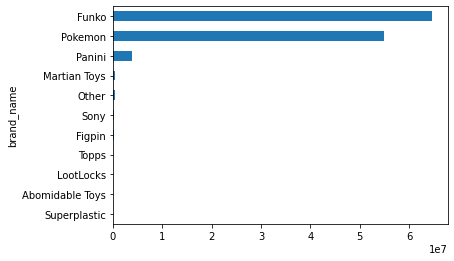

In [65]:
# Funko and Pokemon brands are really crushing it compared to other brands for this period

df.groupby('brand_name')['subtotal_cents'].sum().sort_values().plot.barh()

In [66]:
# Funko has 6069 different products, a much wider array than other brands

df.groupby('brand_name')['product_name'].nunique().sort_values(ascending=False)

brand_name
Funko              6069
Pokemon            1051
Figpin               55
Panini               44
Other                 7
Topps                 6
Martian Toys          5
Abomidable Toys       4
Superplastic          3
Sony                  1
LootLocks             1
Name: product_name, dtype: int64

In [67]:
print()
print('Percent of total transactions - per brand') 

perc_trans = {}
for x in df.brand_name.unique().tolist():
    perc_trans[x] = round(len(df[df['brand_name']==x])/len(df)*100,2)
    #print(f"{x}          {round(len(df[df['brand_name']==x])/len(df)*100,2)}%")
    #print(f"{x} had \t {len(df[df['brand_name']==x])} transactions in this period")
perc_trans


Percent of total transactions - per brand


{'Funko': 56.95,
 'Pokemon': 39.9,
 'Panini': 2.26,
 'Other': 0.4,
 'Figpin': 0.18,
 'Martian Toys': 0.21,
 'Topps': 0.04,
 'Abomidable Toys': 0.01,
 'Superplastic': 0.01,
 'LootLocks': 0.03,
 'Sony': 0.0}

In [68]:
# Here are the 20 MOST EXPENSIVE PRODUCTS during the period.

#      NEXT ACTIONS, NEED MORE DATA:
#      how long did these live streams last?
#      how intense was the bidding?
#      how did the users first hear about the live?
#      how profitable are these products for whatnot?
#      how difficult are they to have human verification?
#      what % of these sales were later contested, and for what reason?
#      how many of the buyers used a $3 off activation coupon or some other special?



df[['subtotal_cents', 'brand_name', 'product_name']].sort_values(by='subtotal_cents', ascending=False)[:20]

,subtotal_cents,brand_name,product_name
6900,270000,Funko,Energizer Bunny (Diamond Glitter)
2217,241900,Pokemon,Livestream Card Item
704,220000,Pokemon,AokisCardhouse Break: Base Set & Base Set 2 Pa...
22770,220000,Pokemon,AokisCardhouse Break: Base Set & Base Set 2 Pa...
19810,220000,Pokemon,AokisCardhouse Break: Base Set & Base Set 2 Pa...
18199,160000,Pokemon,Raichu - Fossil
14107,150000,Funko,slot 1
26571,125000,Pokemon,Base Set Booster Pack
20894,125000,Funko,slot 1
10057,120000,Funko,Freddy Funko - Hulk Hogan Injured


In [69]:
# these sellers each sold at least 2 of the top 100 MOST EXPENSIVE PRODUCTS.  who are they?

    # NEXT ACTIONS, NEED MORE DATA:
    # how were these sellers acquired?
    # how active are they on social media?
    # how many attended their live?
    # how many lives are they hosting monthly?
    # can we send an NPS survey after their most successful auction?
    # can we reward them with some kind of milestone?
    # what is the star rating of the seller, and how did it change after the sale?

df[['subtotal_cents','seller_id']].sort_values(by='subtotal_cents', ascending=False)[:100]['seller_id'].value_counts()[:21]

66835     5
60677     5
75999     5
48944     4
18195     4
64183     4
19045     3
107272    3
35113     3
81224     2
81831     2
16891     2
4882      2
68932     2
84082     2
79568     2
1         2
35187     2
8027      2
74119     2
17641     2
Name: seller_id, dtype: int64

In [70]:
# no null values
df.brand_name.isna().sum()

0

In [71]:
# num of sellers this period

df.seller_id.nunique()

1948

In [72]:
# num of sellers not yet approved 
    # NEXT ACTION, NEED MORE DATA:
    # not sure what this means -- human expert verification no longer needed for approved sellers?
    # understanding what metrics will predict which sellers no longer need human verification could be a big $$ saver.

df.seller_id.loc[~df.seller_approved].nunique()

1649

In [73]:
# top 10 sellers by num of transactions

vip_sellers = pd.DataFrame(df.seller_id.value_counts())
vip_sellers.columns = ['transactions']
vip_sellers[:10]

,transactions
19045,1074
80021,842
24164,809
87575,784
84082,645
38875,637
79104,608
74119,591
8027,580
67901,568


###  busy sellers cohort.   what do we know about them?

In [74]:
vip_sellers_71 = vip_sellers[vip_sellers['transactions']>71]
print(f"There were {len(vip_sellers_71)} sellers who sold more than a product per day during this period.")

There were 127 sellers who sold more than a product per day during this period.


In [75]:
# they are responsible for 72% of transactions 

vip_sellers_71_list = vip_sellers_71.index.tolist()
df_vip = df[df['seller_id'].isin(vip_sellers_71_list)]

print(f"They are responsible for {df_vip.shape[0]/df.shape[0]*100} percent of transactions during this period.")

They are responsible for 72.68710438128335 percent of transactions during this period.


In [76]:
print(f"Our busy seller cohort which is {round(df_vip.seller_id.nunique()/df.seller_id.nunique()*100,2)}% of our sellers are selling to {round(df_vip.user_id.nunique()/df.user_id.nunique()*100,2)}% of our users.\nWhat feedback and suggestions are we currently getting from them?")

Our busy seller cohort which is 6.52% of our sellers are selling to 53.27% of our users.
What feedback and suggestions are we currently getting from them?


In [77]:
# probably some outliers, but:

first_order_time = pd.DataFrame(df.groupby('seller_id')['activation_time'].min())
print(first_order_time.activation_time.mean())
print("The overall average time it takes a new user to make first purchase is 9.5 days.")

9 days 11:15:10.349075975
The overall average time it takes a new user to make first purchase is 9.5 days.


In [78]:

# I wonder how many livestream they've had in those 9 days?  
    # Generally, how many livestreams does it take to get to their first sale
    

In [79]:
vip_first_order_time = pd.DataFrame(df_vip.groupby('seller_id')['activation_time'].min())

print("Our busy seller cohort does well connecting with brand new users: \nThe new user buys from them within 21 hours of installing the app. \nWhereas overall, sellers connect after 9.5 days")
print()
print(vip_first_order_time.activation_time.mean())


Our busy seller cohort does well connecting with brand new users: 
The new user buys from them within 21 hours of installing the app. 
Whereas overall, sellers connect after 9.5 days

0 days 21:18:36.850393700


In [80]:

# I wonder to what extent the 127 busy sellers have high social engagement on other platforms
    # And then bring loyal users to whatnot immediately before the livestream?
        # If this is the case with high performing sellers, how much of new user acquistion are they responsible for?
    

In [81]:
# order_processed_at could be PST or UTC or just be when orders are batched, and thus render this a moot point, but:

o = pd.DataFrame(df_vip['order_processed_at'].dt.strftime('%H').value_counts())
o[o['order_processed_at']>2000].sum()/len(df_vip)


print("Our busy cohort are true night owls: 54% of their orders are processed between midnight and 6am.")

Our busy cohort are true night owls: 54% of their orders are processed between midnight and 6am.


In [82]:

# Are there many livestreams scheduled for this overnight range?  Don't seem to be many advertised
    # Maybe the the latenight ones are more haphazard and less planned?
        # Is this an attribute of these 127 busy sellers and their buyers?
        

### daily transactions:


Daily transactions dropped significantly early Feb; recovered some but increasingly irregular


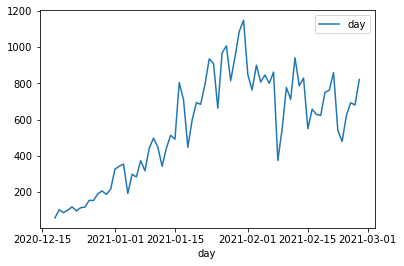

In [83]:
df['day'] = df['order_processed_at'].dt.date
pd.DataFrame(df.groupby('day')['day'].count().sort_index()).plot()
print()
print('Daily transactions dropped significantly early Feb; recovered some but increasingly irregular')

Funko products are responsible for the peak, but all products took a dip early Feb.  
Since the dip isn't product-specific, this could indicate a wider issue, such as platform outage.
Didn't see any mentions on company twitter re: outage.
Although its conceivable that Funko/Pokemon buyers overlap and should be considered part of the same behavioral trend.
They aren't as different as say, Pokemon and Patrick Mahomes buyers might be.
NEXT ACTIONS: Investigate to see why large dip on Feb 8th, and even the 15th, 22nd/23rd.


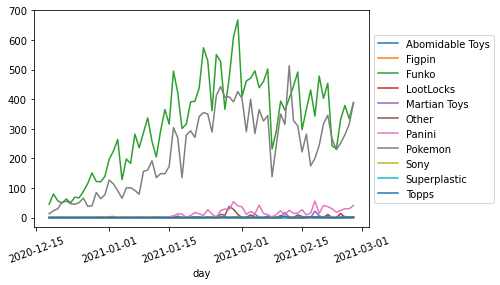

In [84]:
# Plot of Daily Orders by Brand

pd.crosstab(index=df['day'], columns=df['brand_name']).plot(rot=20).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
print("Funko products are responsible for the peak, but all products took a dip early Feb.  \nSince the dip isn't product-specific, this could indicate a wider issue, such as platform outage.\nDidn't see any mentions on company twitter re: outage.\nAlthough its conceivable that Funko/Pokemon buyers overlap and should be considered part of the same behavioral trend.\nThey aren't as different as say, Pokemon and Patrick Mahomes buyers might be.\nNEXT ACTIONS: Investigate to see why large dip on Feb 8th, and even the 15th, 22nd/23rd.")


It seems only Livestream sales took a dip on Feb 8, while Standard sales werent affected.
This could be more evidence of platform issue, but maybe not.


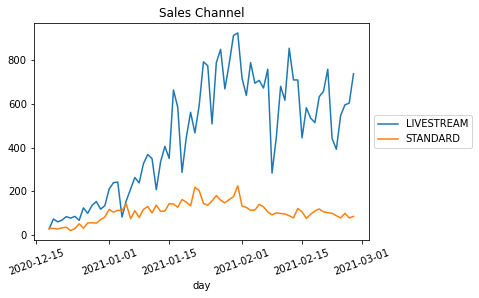

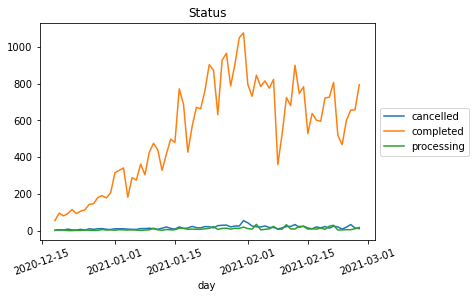

In [85]:
print()
print('It seems only Livestream sales took a dip on Feb 8, while Standard sales werent affected.\nThis could be more evidence of platform issue, but maybe not.')
pd.crosstab(index=df['day'], columns=df['sales_channel']).plot(rot=20, title='Sales Channel').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pd.crosstab(index=df['day'], columns=df['status']).plot(rot=20, title='Status').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


Something happened with listing condition id 17 on the Feb 8 dip.  
It collapsed and then never recovered. 
NEXT ACTION:
	Most likely company operations chose to replace that listing id with 90 and 91, but it would be good to verify this, and determine if this is a cause, effect or correlation to the dip.


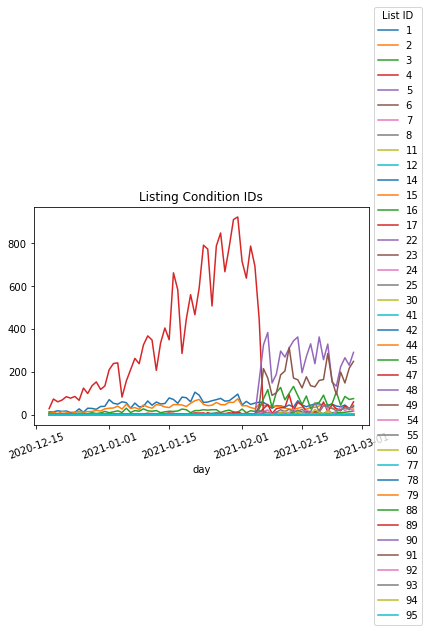

In [86]:
print()
print("Something happened with listing condition id 17 on the Feb 8 dip.  \nIt collapsed and then never recovered. \nNEXT ACTION:\n\tMost likely company operations chose to replace that listing id with 90 and 91, but it would be good to verify this, and determine if this is a cause, effect or correlation to the dip.")

pd.crosstab(index=df['day'], columns=df['listing_condition_id']).plot(rot=20, title="Listing Condition IDs").legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='List ID')

In [87]:
print()
print("NEXT ACTIONS:  Investigate on a product_level-not brand-what we were selling on these high volume days that declined:")
print()
print(pd.DataFrame(df.groupby('day')['day'].count().sort_values(ascending=False))[:15])


NEXT ACTIONS:  Investigate on a product_level-not brand-what we were selling on these high volume days that declined:

             day
day             
2021-01-31  1149
2021-01-30  1087
2021-01-27  1008
2021-01-26   968
2021-01-29   945
2021-02-12   942
2021-01-23   936
2021-01-24   910
2021-02-03   901
2021-02-07   863
2021-02-21   860
2021-02-01   849
2021-02-05   847
2021-02-14   830
2021-02-27   822


In [88]:
print("NEXT ACTION: could investigate social media sentiment such as this from Twitter (Although this might be good news for sellers):")
print()
print('@mossfan563:"To all my friends who sell cards, whether its Pokemon or Sports, might want to check out the WhatNot app. People overpay for nearly ANYTHING lmao Just saw a PSA 9 Lebron Top Prospects card that goes on eBay for like $60 and it sold on WhatNot for $185"')
print()
print("Also look more broadly into buyer behavior, such as the extent to which they'll happily pay more during a live auction than they would on an ebay.")

NEXT ACTION: could investigate social media sentiment such as this from Twitter (Although this might be good news for sellers):

@mossfan563:"To all my friends who sell cards, whether its Pokemon or Sports, might want to check out the WhatNot app. People overpay for nearly ANYTHING lmao Just saw a PSA 9 Lebron Top Prospects card that goes on eBay for like $60 and it sold on WhatNot for $185"

Also look more broadly into buyer behavior, such as the extent to which they'll happily pay more during a live auction than they would on an ebay.


In [89]:
print("NEXT ACTION: could see if decline in Funko corresponds with a drop off in celebrity collabs--such as Sklar Brothers in Feb?")

NEXT ACTION: could see if decline in Funko corresponds with a drop off in celebrity collabs--such as Sklar Brothers in Feb?


In [90]:
print("NEXT ACTION: According to SEMrush, the search term 'funko whatnot' has steadily increased every month since last July.  Search volume today for this term is 4 times what it was then.  Looking into this would be a more broad approach that may not yield much for short term dips.")

NEXT ACTION: According to SEMrush, the search term 'funko whatnot' has steadily increased every month since last July.  Search volume today for this term is 4 times what it was then.  Looking into this would be a more broad approach that may not yield much for short term dips.


In [91]:
print("NEXT ACTION: Could research if there's any negative sentiment from FB Group Funko Pop Fans https://www.facebook.com/groups/780037802786760 or  Youtuber Dr Applesauce https://www.youtube.com/watch?v=BdtSzraVpuk during this period")

NEXT ACTION: Could research if there's any negative sentiment from FB Group Funko Pop Fans https://www.facebook.com/groups/780037802786760 or  Youtuber Dr Applesauce https://www.youtube.com/watch?v=BdtSzraVpuk during this period


In [92]:
print('Most users make purchases on Friday, Saturday, Sunday and late at night.  \nThis speaks to the "hangout and chill element" that users experience during well run livestream with strong seller content and good chats')

df['weekday'] = df['order_processed_at'].dt.weekday
df['weekday'].value_counts()

Most users make purchases on Friday, Saturday, Sunday and late at night.  
This speaks to the "hangout and chill element" that users experience during well run livestream with strong seller content and good chats


5    7045
6    6417
4    6275
2    5646
3    5556
1    4984
0    4362
Name: weekday, dtype: int64

### sales channel,  style, cancellations, listing conditions:

In [93]:
# sales channel:

df_std = df[df['sales_channel']=='STANDARD'].copy()

std1 = pd.DataFrame(df_std['product_name'].value_counts())
std1.rename(columns={'product_name':'quant_sold_std'}, inplace=True)
std1.reset_index(inplace=True)
std2 = pd.DataFrame(df['product_name'].value_counts())
std2.rename(columns={'product_name':'quant_sold_overall'}, inplace=True)
std2.reset_index(inplace=True)
std3 = pd.merge(std1, std2)
std3['perc'] = std3['quant_sold_std']/std3['quant_sold_overall']
std3.sort_values('quant_sold_std', ascending=False, inplace=True)
print('Most of these 20 products sell more via STANDARD sales channel, rather than LIVESTREAM. \nAlthough we are a livestream platform, it might be good to see why these products sell well w/o an auction.  Maybe a recommendation engine can email these products to users for anytime purchases--not during lives')
print('Although STANDARD sales channel is much smaller revenue source than LIVESTREAM, it might have better ROI, particularly if some products dont require human verification')
print('They come for the auctions, and then discover a range of ancillary products, purchaseable anytime through STANDARD')
std3[:20]

Most of these 20 products sell more via STANDARD sales channel, rather than LIVESTREAM. 
Although we are a livestream platform, it might be good to see why these products sell well w/o an auction.  Maybe a recommendation engine can email these products to users for anytime purchases--not during lives
Although STANDARD sales channel is much smaller revenue source than LIVESTREAM, it might have better ROI, particularly if some products dont require human verification
They come for the auctions, and then discover a range of ancillary products, purchaseable anytime through STANDARD


,index,quant_sold_std,quant_sold_overall,perc
0,Spider-Man (Black Light) Funko Pop & T-shirt,50,59,0.847458
1,Ochaco Uraraka,39,60,0.650000
2,Kakashi (Lightning Blade),34,46,0.739130
3,Harley Quinn (Black Light Glow),20,32,0.625000
4,Scooby-Doo,19,44,0.431818
5,Batman (Black Light Glow),18,37,0.486486
6,Rock Lee,17,27,0.629630
7,Madara (Reanimation),17,25,0.680000
8,Mr. Compress [Fall Convention],16,24,0.666667
9,Champion's Path Elite Trainer Box,16,111,0.144144


In [94]:
# almost all users are "active", but how is this defined?  
    # we could make a more rigorous threshold for considered "active"
        # perhaps a min num of minutes spent per week

df.is_active.value_counts()

True     40282
False        3
Name: is_active, dtype: int64

In [95]:
# style

print(df['style'].value_counts())
print(df_vip['style'].value_counts())
print()
print("It seems a huge porportion of sellers who aren't in the busy cohort (ie not as successful) \n\tare doing the direct offer method, instead of direct order. \nPerhaps they can be trained out of this to increase their sales?")

DIRECT_ORDER    37760
DIRECT_OFFER     2137
ORDER             304
OFFER              84
Name: style, dtype: int64
DIRECT_ORDER    29096
DIRECT_OFFER      159
ORDER              22
OFFER               5
Name: style, dtype: int64

It seems a huge porportion of sellers who aren't in the busy cohort (ie not as successful) 
	are doing the direct offer method, instead of direct order. 
Perhaps they can be trained out of this to increase their sales?


In [96]:
df.groupby('style')['subtotal_cents'].sum()

style
DIRECT_OFFER      4584204
DIRECT_ORDER    116121400
OFFER              996935
ORDER             3140000
Name: subtotal_cents, dtype: int64

In [97]:
df_vip.groupby('style')['subtotal_cents'].sum()

style
DIRECT_OFFER      327318
DIRECT_ORDER    90973400
OFFER             111970
ORDER             164000
Name: subtotal_cents, dtype: int64

In [98]:
# 40 different listing conditions.
    # if there were more or less categories of conditions, could this decrease disputed orders?

print(df['listing_condition_id'].nunique())

40


In [99]:
# cancelled orders & listing condition id's

print("Cancelled orders this period covered $34.2k.\nThe listing conditions with high cancellation rates were minimal in terms of lost sales.\nNEXT ACTION: \n\tBut it'd be prudent to continue monitoring this, as perhaps there is a product, seller, or brand reason why these cancellations occur.\n\tFurther cancellation analysis could shed light on any number of other analyses, ux issue, or customer pain point, not to mention find ways to reduce the lost revenue.")

c = df[df['status']=='cancelled'].copy()
c = pd.DataFrame(c['listing_condition_id'].value_counts())
c.reset_index(inplace=True)
c.rename(columns={'index':'list_cond', 'listing_condition_id':'cancels'}, inplace=True)
b = df['listing_condition_id'].value_counts()
b = pd.DataFrame(b)
b.reset_index(inplace=True)
b.rename(columns={'index':'list_cond', 'listing_condition_id':'overall'}, inplace=True)
d = pd.merge(c,b)
d['ratio'] = d['cancels']/d['overall']
d.sort_values('ratio', ascending=False, inplace=True)
e = pd.DataFrame(df.groupby('listing_condition_id').agg(total_sales_cents = pd.NamedAgg(column='subtotal_cents', aggfunc=sum),
                                      quantity = pd.NamedAgg(column='subtotal_cents', aggfunc=len)).sort_values('quantity', ascending=False))
e.reset_index(inplace=True)
e.rename(columns={'listing_condition_id':'list_cond'}, inplace=True)
f = pd.merge(d,e)
f['lost_sales_cents'] = round(f['ratio']*f['total_sales_cents'], 2)
f

Cancelled orders this period covered $34.2k.
The listing conditions with high cancellation rates were minimal in terms of lost sales.
NEXT ACTION: 
	But it'd be prudent to continue monitoring this, as perhaps there is a product, seller, or brand reason why these cancellations occur.
	Further cancellation analysis could shed light on any number of other analyses, ux issue, or customer pain point, not to mention find ways to reduce the lost revenue.


,list_cond,cancels,overall,ratio,total_sales_cents,quantity,lost_sales_cents
0,60,1,1,1.000000,8500,1,8500.00
1,55,1,2,0.500000,6350,2,3175.00
2,8,3,11,0.272727,29565,11,8063.18
3,42,1,4,0.250000,38925,4,9731.25
4,45,1,5,0.200000,4900,5,980.00
5,54,1,6,0.166667,19210,6,3201.67
6,41,7,66,0.106061,496130,66,52619.85
7,48,3,40,0.075000,158470,40,11885.25
8,44,3,40,0.075000,909020,40,68176.50
9,47,14,194,0.072165,411140,194,29669.90


In [100]:
# would need more information about listing conditions to determine if there are correlations in sales
    # most items on the platform are sold at condition 17 -- or where at 17
        # while highest average transaction price is from condition 22, which are 4 expensive Pokemon.

import numpy as np
df.groupby('listing_condition_id').agg(avg_sales = pd.NamedAgg(column='subtotal_cents', aggfunc=np.mean),
                                      quantity = pd.NamedAgg(column='subtotal_cents', aggfunc=len)).sort_values('quantity', ascending=False)


,avg_sales,quantity
listing_condition_id,,
17,3393.838047,19166
90,2823.815010,6076
91,2727.000000,3900
1,2410.753811,3477
2,2352.822061,2484
88,3864.891750,1709
3,2279.815368,937
89,3155.270270,740
93,4263.056093,517


#### Additional Questions to Explore:


What's going on with Funko pops, why the decline?  If user makes 2nd purchase within 11 days, does that mean they're more likely to remain active on platform 4 months later? If not, when does the decline begin?  Why don't sellers get approved? How to get more info about high volume sellers?  What is CAC for each seller?  What is profit margin on each transaction, and what factors go into that?  Is there correlation between how long someone in a room and how satisfied they are with their transaction?  Maybe can put NPS survey after each sale?  Would like acquisition source per seller.  How does their frequency of livestream affect sales?  How does the livestream title affect its momentum of people joining? What is the most costly item for human verification?  Do we give pointers to sellers such as have background music, make sure your phone is charged, purchase a rotating table, have short auction times, show the package very slow, etc?  Do we have data on how often people type in chat complimenting how good the seller's content is?  Can we offer incentives for those installing during slow times of day? 
VIP Sellers: What do high vol sellers have in common? How many are doing big numbers this period?  What other data do we have on them?  How are they conducting their livestreams? How are they annoucing their livestreams on other platforms, and bringing users in as a result of that? What qualitative data do we have on them? Can we send a brief survey to them, asking for feedback.  Would like data on how many audience members visited each sellers live, and compare this to other insights above.